# S06 T01: Tasca mètodes de mostreig

## Nivell 1. Exercici 1
### Agafa un conjunt de dades de tema esportiu que t'agradi. 
### Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.

In [67]:
# Pandas for managing datasets
import pandas as pd
import numpy as np

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
import random 
import imblearn

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification

In [2]:
# the sport's data is about earning of e-game players
df = pd.read_csv("highest_earning_players.csv")
df.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter


In [3]:
df.shape

(1000, 8)

In [4]:
df.isna().sum()

PlayerId         0
NameFirst        0
NameLast         0
CurrentHandle    0
CountryCode      0
TotalUSDPrize    0
Game             0
Genre            0
dtype: int64

In [5]:
df["CountryCode"].unique()

array(['dk', 'us', 'br', 'ca', 'se', 'fr', 'sk', 'no', 'ba', 'ru', 'ua',
       'pl', 'nl', 'ee', 'fi', 'kz', 'bg', 'cz', 'tr', 'be', 'es', 'de',
       'gb', 'cn', 'uz', 'au', 'jo', 'lb', 'pk', 'il', 'ro', 'my', 'sg',
       'mo', 'mk', 'ph', 'kr', 'by', 'tw', 'hr', 'hk', 'si', 'at', 'ar',
       'ch', 'lv', 'lt', 'jp', 'mx', 'it', 'ie', 'gi', 'cu', 'vn', 'th',
       'gr'], dtype=object)

In [6]:
df.Game.unique()

array(['Counter-Strike: Global Offensive', 'Dota 2', 'League of Legends',
       'Fortnite', 'Overwatch', 'Starcraft II', 'Heroes of the Storm',
       'PUBG', 'Arena of Valor', 'Hearthstone'], dtype=object)

In [7]:
df.Genre.unique()

array(['First-Person Shooter', 'Multiplayer Online Battle Arena',
       'Battle Royale', 'Strategy', 'Collectible Card Game'], dtype=object)

In [8]:
count = df['Genre'].value_counts() 
count

Multiplayer Online Battle Arena    400
Battle Royale                      200
First-Person Shooter               200
Collectible Card Game              100
Strategy                           100
Name: Genre, dtype: int64

In [9]:
real_mean = round(df["TotalUSDPrize"].mean(),3)
real_mean

397793.216

In [10]:
df["TotalUSDPrize"].nlargest()

100    6952596.58
101    6470000.02
102    6000411.96
103    5554297.41
104    5470902.57
Name: TotalUSDPrize, dtype: float64

### Simple random sampling

In [11]:
#simple sampling (random)
simple_random_sample = df.sample(n=100).sort_values(by="PlayerId")
simple_random_sample

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
616,1049,Do Joon,Chae,Noblesse,kr,164811.62,Heroes of the Storm,Multiplayer Online Battle Arena
561,1080,Hyun Woo,Jang,Creator,kr,141938.84,Starcraft II,Strategy
525,1158,Ilyes,Satouri,Stephano,fr,304291.61,Starcraft II,Strategy
541,1225,Grzegorz,Komincz,MaNa,pl,218911.98,Starcraft II,Strategy
573,1430,Xiang,Hu,MacSed,cn,111540.17,Starcraft II,Strategy
...,...,...,...,...,...,...,...,...
836,70309,-,-,久龙,cn,65922.73,Arena of Valor,Multiplayer Online Battle Arena
837,70310,-,-,北岛,cn,65922.73,Arena of Valor,Multiplayer Online Battle Arena
897,70343,-,-,Rain,tw,26645.00,Arena of Valor,Multiplayer Online Battle Arena
767,74025,Do-gyeong,Kim,DoYa,kr,67687.33,PUBG,Battle Royale


In [12]:
#simple random sample mean
simple_random_mean=round(simple_random_sample["TotalUSDPrize"].mean(),3)
simple_random_mean

332280.322

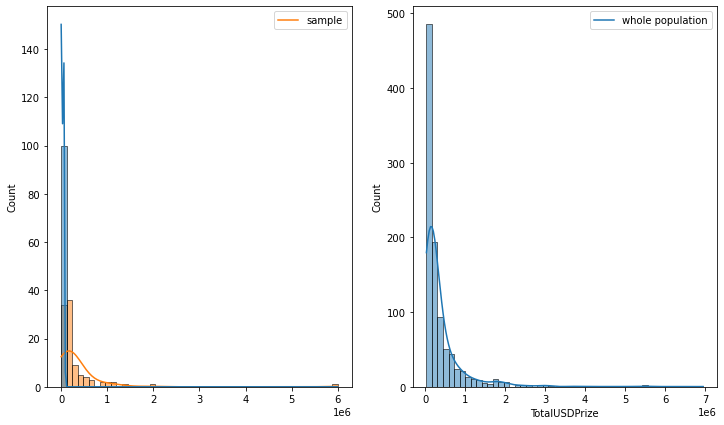

In [13]:
fig,ax = plt.subplots(ncols=2,figsize=(12,7))
sns.histplot(simple_random_sample,kde=True,bins=50,ax=ax[0])
#sns.kdeplot(salarios,alpha=0.5)
ax[0].legend(['sample'])
sns.histplot(df['TotalUSDPrize'],kde=True,bins=50,ax=ax[1])
plt.legend(['whole population'])

### Systematic sample

In [14]:
# systematic sample
# hacemos una función y ponemos un intervalo 

def systematic_sampling(df, step):
    
    indexes=np.arange(0, len(df),step=step) 
    systematic_sample=df.iloc[indexes]
    return systematic_sample


In [15]:
# The seleccion will be every 5 
# Ask for Systematic sample
systematic_sample = systematic_sampling(df,5)

In [68]:
systematic_sample_mean=round(systematic_sample["TotalUSDPrize"].mean(),3)
systematic_sample_mean

431946.415

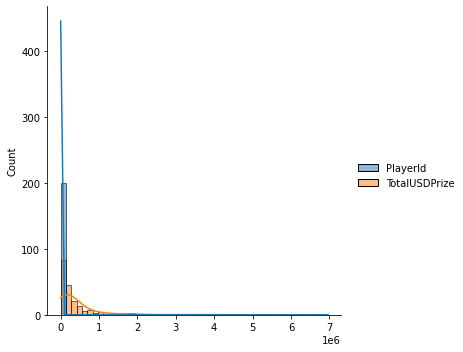

In [17]:
sns.displot(systematic_sample,kde=True,bins=50)

## Nivell 2. Exercici 2
### Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).

### Stratified Sample

In [18]:
df.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter


In [19]:
#stratified random sampling
#randomly selecting 20 players from each genre to be included in the sample:

stratified_sample = df.groupby('Genre', group_keys = False ).apply( lambda x: x.sample (20))


In [20]:
stratified_sample_mean = round(stratified_sample["TotalUSDPrize"].mean(),3)
stratified_sample_mean

349634.915

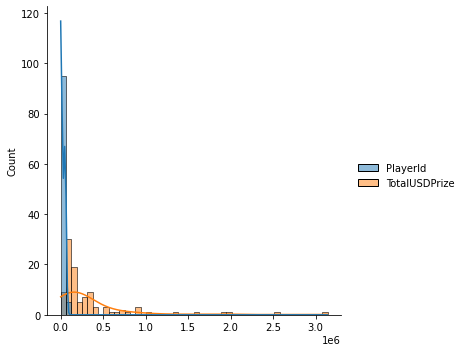

In [21]:
sns.displot(stratified_sample,kde=True,bins=50)

In [22]:
# the sample selects 20 rows for every genre
count = stratified_sample['Genre'].value_counts() 
count

Collectible Card Game              20
Battle Royale                      20
First-Person Shooter               20
Multiplayer Online Battle Arena    20
Strategy                           20
Name: Genre, dtype: int64

In [23]:
# stratified random sampling taking into account the size of the groups.
# The column Genre has different sizes: 
# Multiplayer Online Battle Arena (400), First-Person Shooter(200), Battle Royale (200), 
# Collectible Card Game (100), Strategy (100)

#define total sample size desired
N = 100

#perform stratified random sampling

stratified_sample2 = df.groupby('Genre', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(df))))).sample(frac=1).reset_index(drop=True)


In [25]:
stratified_sample2_mean = round(stratified_sample["TotalUSDPrize"].mean(),3)
stratified_sample2_mean
# the mean is exactly the same than in the stratified_sample (above), but the distribution is different

349634.915

In [27]:
# Here, the distribution is taking into account the weight of every genre in the sample
count = stratified_sample2['Genre'].value_counts() 
count

Multiplayer Online Battle Arena    40
Battle Royale                      20
First-Person Shooter               20
Collectible Card Game              10
Strategy                           10
Name: Genre, dtype: int64

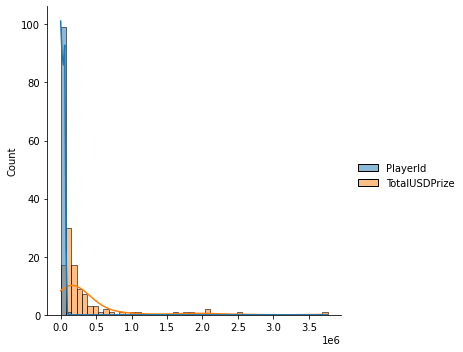

In [28]:
sns.displot(stratified_sample2,kde=True,bins=50)

### SMOTE (Synthetic Minority Oversampling Technique)

In [29]:
df.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter


In [30]:
total = int(len(df))
count = df.Genre.value_counts() 
count

Multiplayer Online Battle Arena    400
Battle Royale                      200
First-Person Shooter               200
Collectible Card Game              100
Strategy                           100
Name: Genre, dtype: int64

In [85]:
# Remap the column Genre into integers (0 - 1) – these columns have only two possible values
# This is the only colum in the DF that can be changed for this purpose
# I choose the Multiplayer Online Battle Arena genre for comparison with the rest of genres

values = {"Multiplayer Online Battle Arena":1,
         "First-Person Shooter": 0,
         "Battle Royale" : 0,
         "Collectible Card Game": 0,
         "Strategy": 0}
df["values"] = df["Genre"].apply(lambda x: values[x])
df

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre,values
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter,0
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter,0
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter,0
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter,0
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter,0
...,...,...,...,...,...,...,...,...,...
995,7400,Janne,Mikkonen,Savjz,fi,50734.44,Hearthstone,Collectible Card Game,0
996,3255,Drew,Biessener,Tidesoftime,us,50449.60,Hearthstone,Collectible Card Game,0
997,49164,Simone,Liguori,Leta,it,49300.00,Hearthstone,Collectible Card Game,0
998,43043,Mike,Eichner,Ike,us,48550.00,Hearthstone,Collectible Card Game,0


In [86]:
# the column "values" has only 2 values (0-1) just for SMOTE purposes
# the comparison is between the genre "Multiplayer Online Battle Arena" and the rest of genres
count = df['values'].value_counts() 
count

0    600
1    400
Name: values, dtype: int64

In [87]:
df_extract = df[['TotalUSDPrize', 'values']]
df_extract

,TotalUSDPrize,values
0,1822989.41,0
1,1799288.57,0
2,1787489.88,0
3,1652350.75,0
4,1416448.64,0
...,...,...
995,50734.44,0
996,50449.60,0
997,49300.00,0
998,48550.00,0


In [88]:
X=df_extract
y="values"
X, y = make_classification(n_classes=2, class_sep=1.0,
weights=[0.6, 0.4], n_informative=2, n_redundant=0, flip_y=0.06,
n_features=2, n_clusters_per_class=1, n_samples=200, random_state=1)

print('Original dataset shape %s' % Counter(y))

# Original dataset shape Counter({0: 120, 1: 80})
sm = SMOTE(random_state= 42)
X_res, y_res = sm.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_res))
# Resampled dataset shape Counter({1: 120, 0: 120})

Original dataset shape Counter({0: 120, 1: 80})
Resampled dataset shape Counter({1: 120, 0: 120})


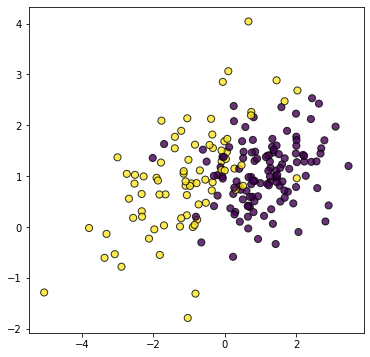

In [93]:
_, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, edgecolor="k", s=50, marker='o')


## Nivell 3. Exercici 3
### Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

In [97]:
df.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter


In [98]:
# Reservoir sampling

stream = df.index
# Doing Reservoir Sampling from the stream
k=100
reservoir = []
for i, element in enumerate(stream):
    if i+1<= k:
        reservoir.append(element)
    else:
        probability = k/(i+1)
        if random.random() < probability:
            # Select item in stream and remove one of the k items already selected
             reservoir[random.choice(range(0,k))] = element

In [101]:
reservoir

[428,
 131,
 103,
 137,
 520,
 219,
 6,
 795,
 266,
 215,
 10,
 840,
 385,
 648,
 793,
 642,
 876,
 154,
 270,
 517,
 20,
 305,
 964,
 189,
 660,
 940,
 426,
 447,
 853,
 29,
 30,
 233,
 163,
 835,
 275,
 617,
 573,
 177,
 826,
 842,
 525,
 687,
 523,
 802,
 599,
 764,
 204,
 232,
 48,
 543,
 907,
 119,
 623,
 311,
 783,
 480,
 949,
 843,
 942,
 558,
 60,
 769,
 563,
 601,
 867,
 466,
 668,
 925,
 604,
 434,
 677,
 495,
 170,
 274,
 877,
 510,
 644,
 776,
 974,
 596,
 917,
 803,
 148,
 367,
 559,
 248,
 605,
 824,
 970,
 898,
 606,
 439,
 280,
 113,
 749,
 95,
 702,
 620,
 484,
 366]

In [102]:
len(reservoir)

100

In [103]:
a = min(reservoir)
b = max(reservoir)
print(a, b)

6 974


In [104]:
reservoir_sample = df[df.index.isin(reservoir)]
reservoir_sample.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
6,12183,Epitácio,de Melo,TACO,br,1063858.27,Counter-Strike: Global Offensive,First-Person Shooter
10,10629,Keith,Markovic,NAF,ca,982765.66,Counter-Strike: Global Offensive,First-Person Shooter
20,3290,Nathan,Schmitt,NBK,fr,805444.66,Counter-Strike: Global Offensive,First-Person Shooter
29,3881,Richard,Papillon,shox,fr,660640.55,Counter-Strike: Global Offensive,First-Person Shooter
30,4998,Janusz,Pogorzelski,snax,pl,653938.44,Counter-Strike: Global Offensive,First-Person Shooter


In [105]:
reservoir_sample.Genre.describe()

count                                 100
unique                                  5
top       Multiplayer Online Battle Arena
freq                                   49
Name: Genre, dtype: object

In [106]:
reservoir_sample_mean= round(reservoir_sample["TotalUSDPrize"].mean(),3)
reservoir_sample_mean

424298.031

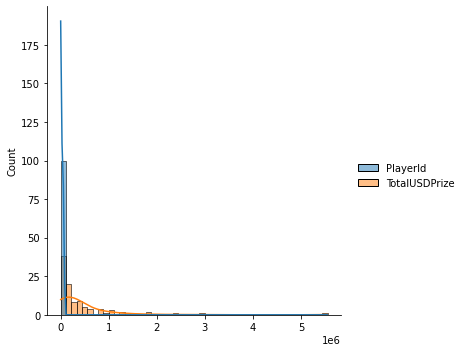

In [107]:
sns.displot(reservoir_sample,kde=True,bins=50)

In [108]:
# Finally, the comparison between the differente samples are:
print("A USD Prize in the real DataFrame is: ", real_mean)
print('A USD Prize with Simple random sample: ', simple_random_mean)
print('A USD Prize with sistemating sampling is', systematic_sample_mean)
print('A USD Prize with stratified sampling is', stratified_sample_mean)
print('A USD Prize with reservoir sampling is', reservoir_sample_mean)

A USD Prize in the real DataFrame is:  397793.216
A USD Prize with Simple random sample:  332280.322
A USD Prize with sistemating sampling is 431946.415
A USD Prize with stratified sampling is 349634.915
A USD Prize with reservoir sampling is 424298.031
